In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
# reading the data
data=pd.read_csv('../data/clustered_data.csv')

In [94]:
data.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,Cluster,labels
0,2.5,1,6,3,1,1,False,True,False,False,...,-0.956261,-0.823865,0.009759,0.461838,-0.189283,1.165505,0.749653,1406.91,2,1
1,2.5,1,6,2,0,0,False,False,False,False,...,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,-1.372696,-1.823346,1197.22,2,1
2,1.0,0,7,2,0,0,False,False,False,False,...,-0.668404,1.140056,1.229693,1.362107,0.054644,-0.736072,-0.785565,1413.14,2,0
3,2.5,0,7,3,0,0,True,False,False,False,...,-0.956261,-0.823865,0.009759,0.461838,-0.224130,-0.219722,0.677607,1415.74,2,1
4,5.0,1,5,2,0,0,False,False,False,False,...,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,-1.399654,-1.768252,1583.91,1,0


##### Plot the cluster vs labels to see 
1. Is all clusters has same distribution of lables
2. Is the correlation betwwen variables changes in clusters

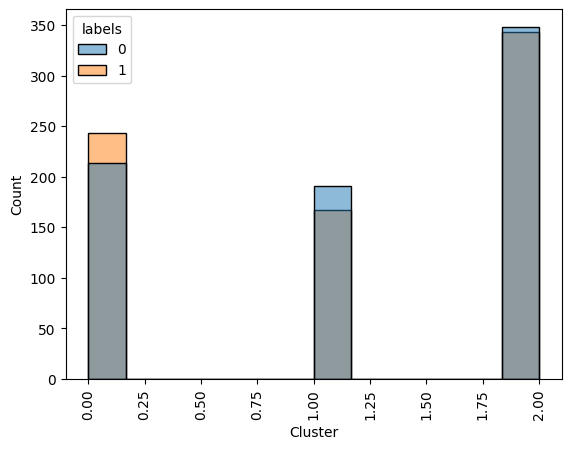

In [95]:
sns.histplot(data,hue=data['labels'],x="Cluster")
plt.xticks(rotation=90)
plt.show()

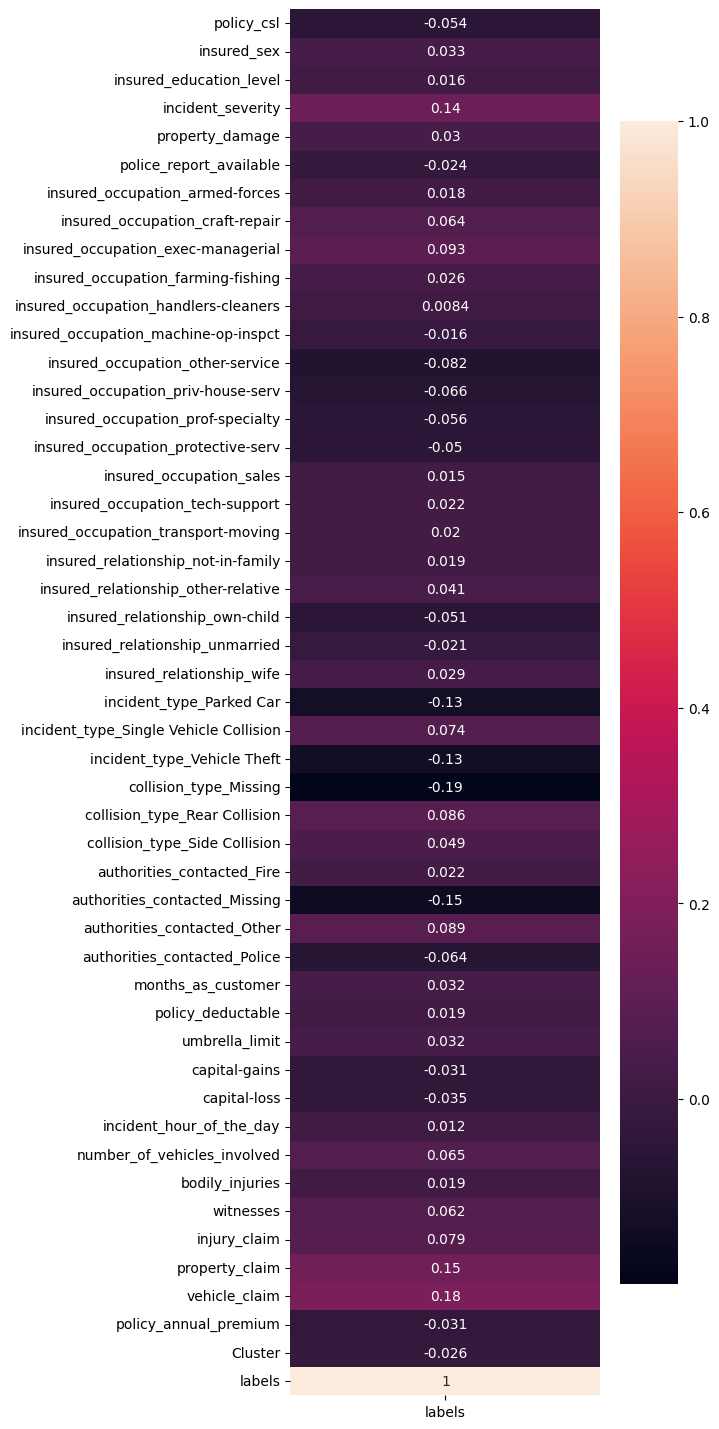

In [96]:
plt.figure(figsize=(5,18))
df_corr=data.corr()
sns.heatmap(df_corr[['labels']], annot=True )
plt.show()

In [97]:
data.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_unmarried', 'insured_relationship_wife',
       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft',

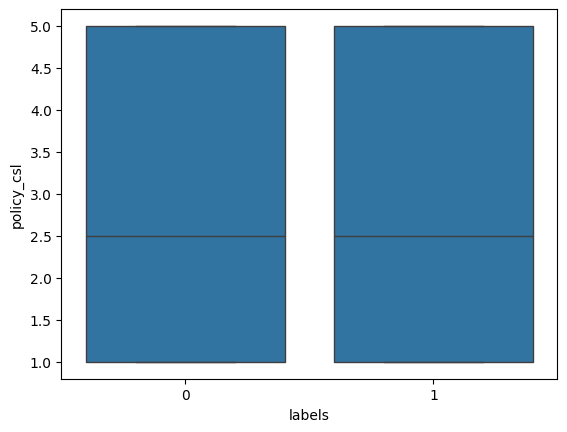

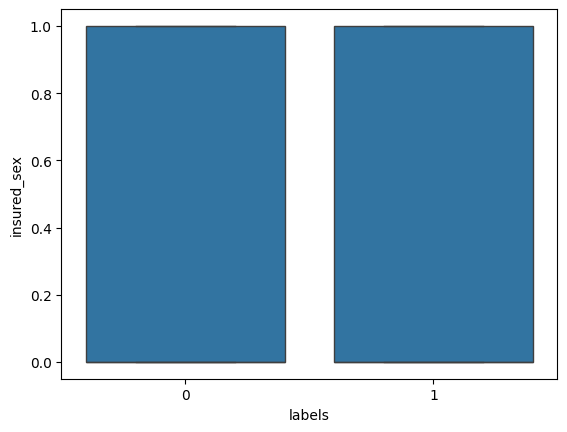

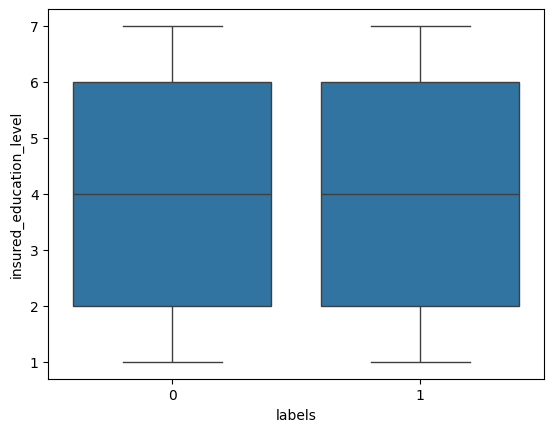

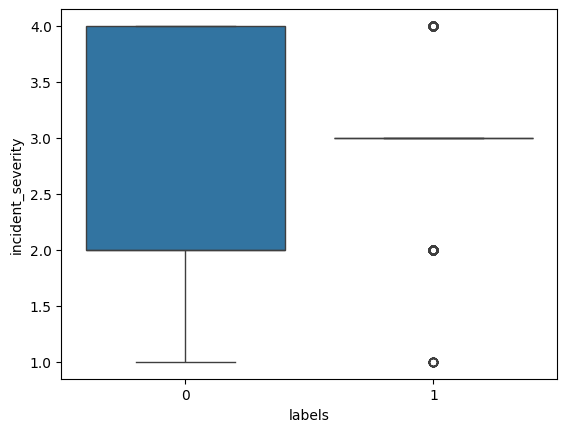

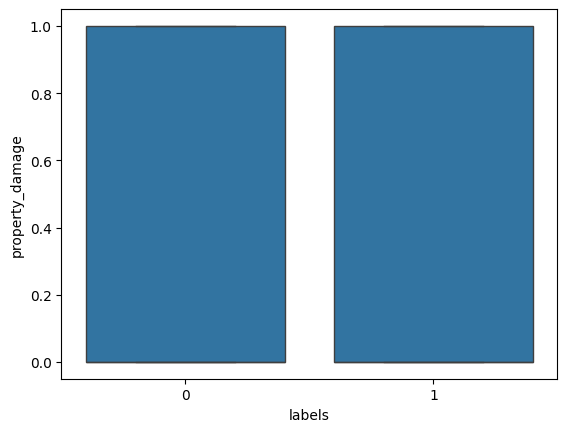

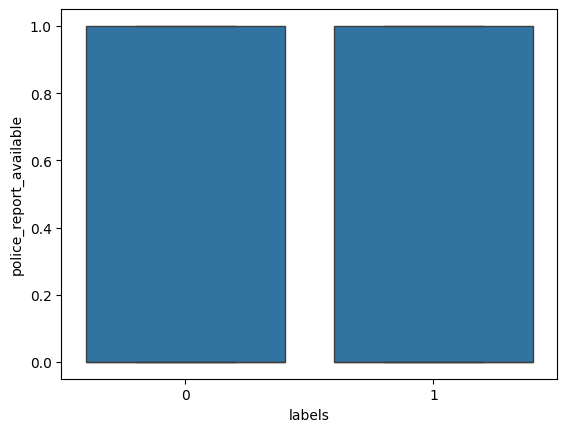

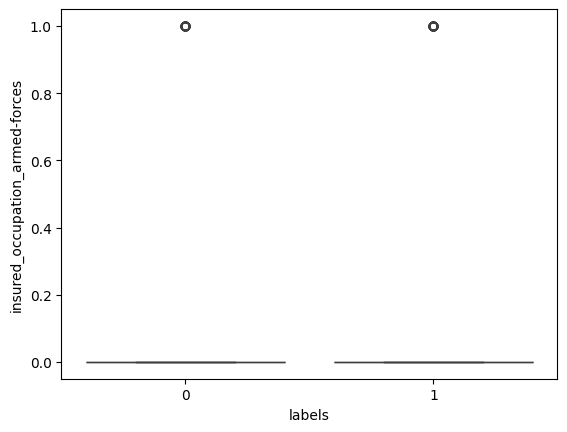

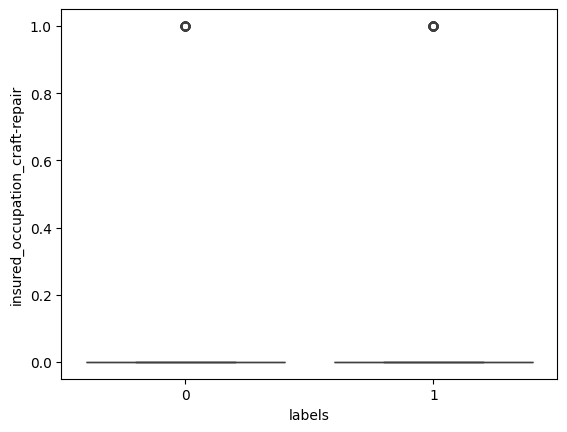

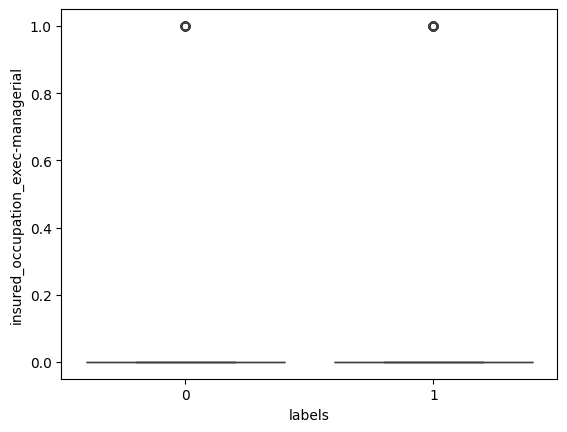

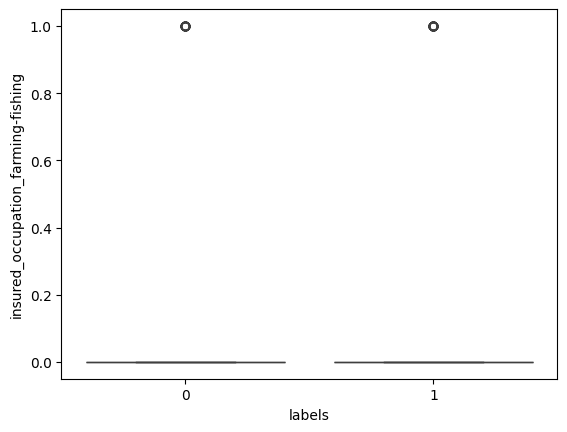

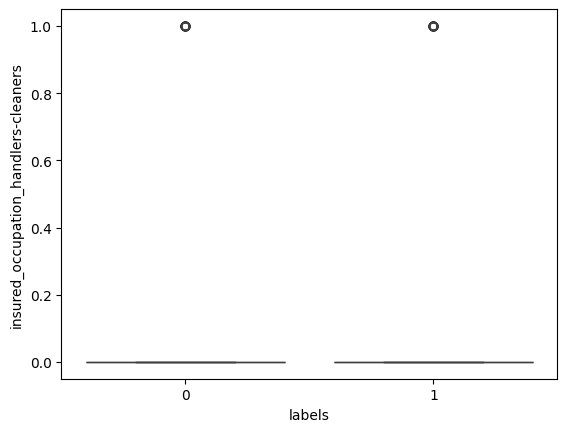

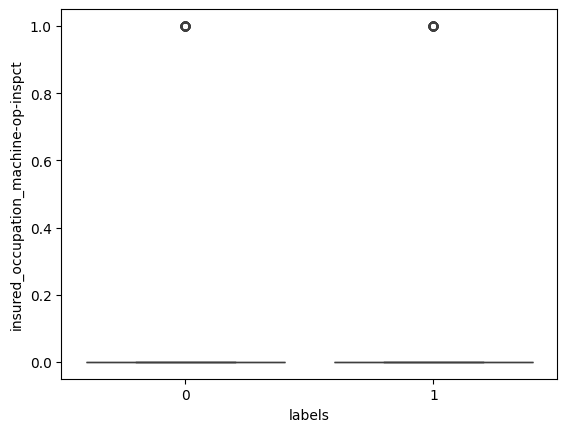

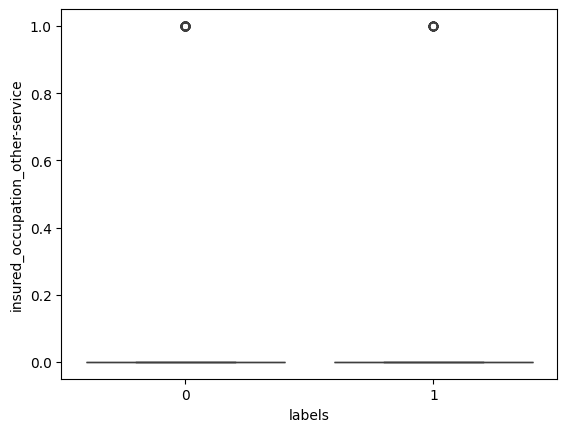

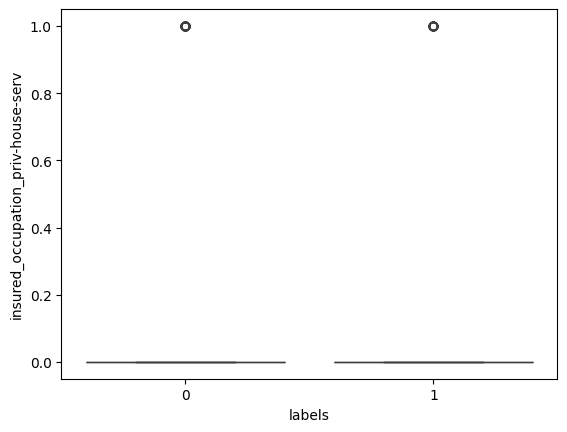

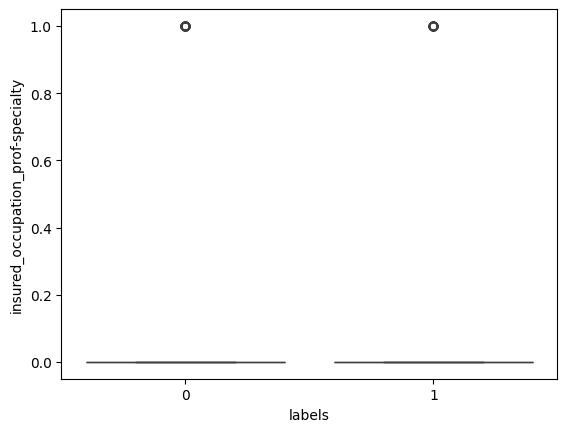

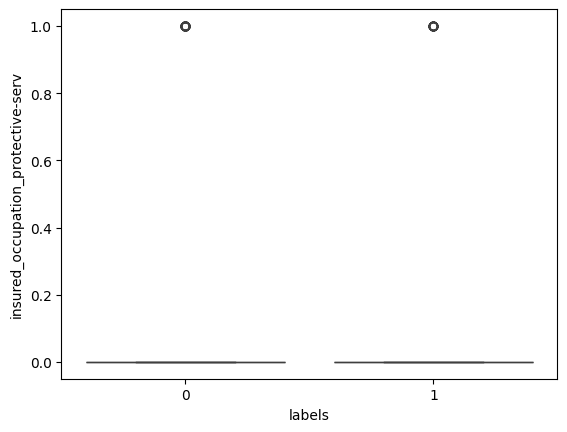

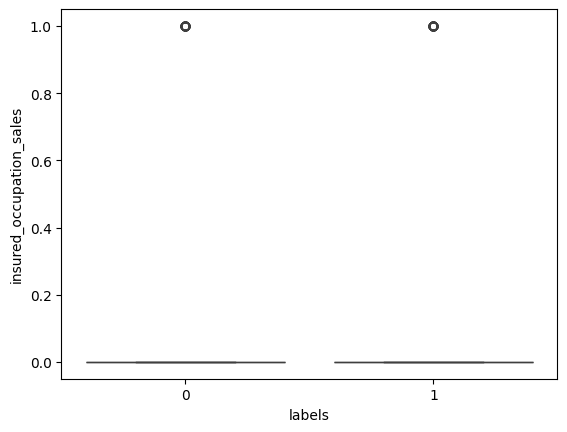

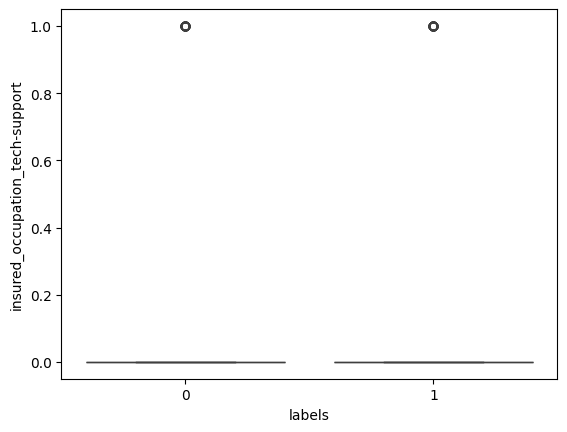

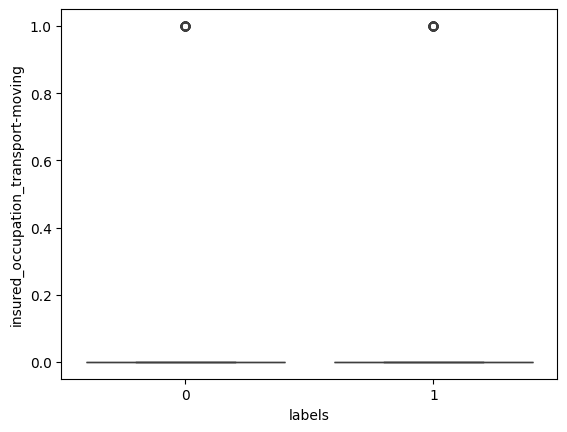

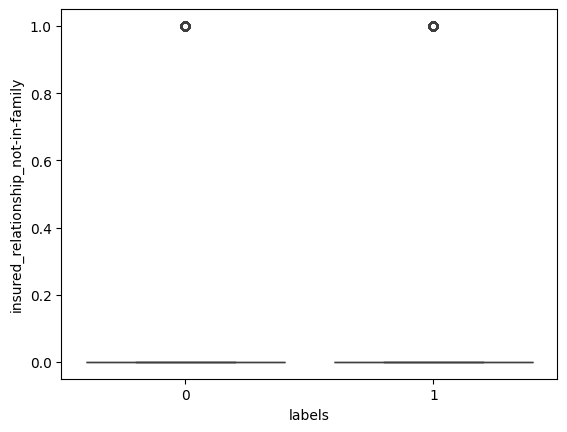

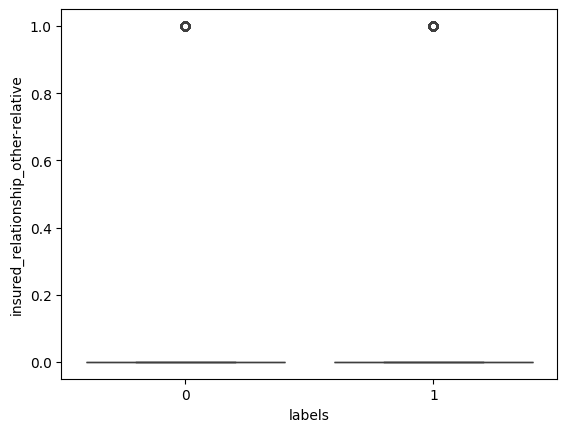

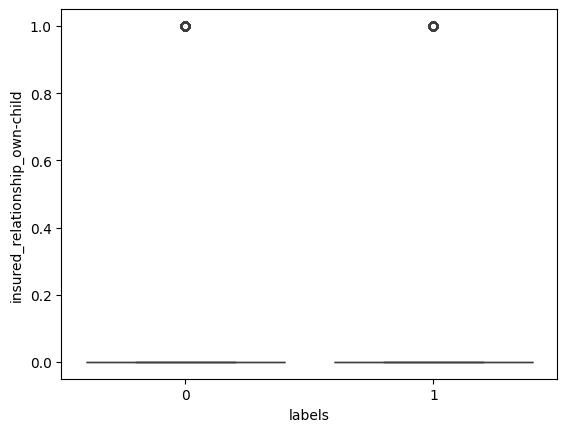

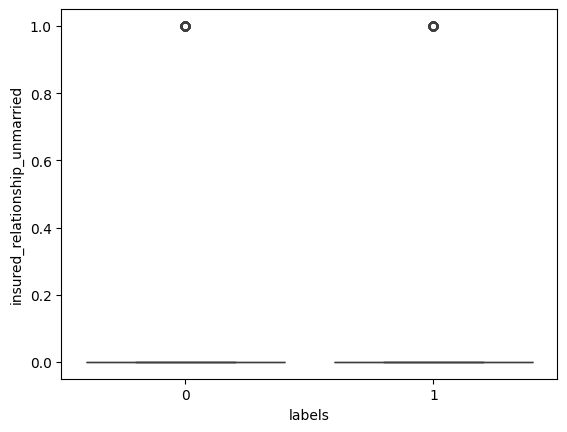

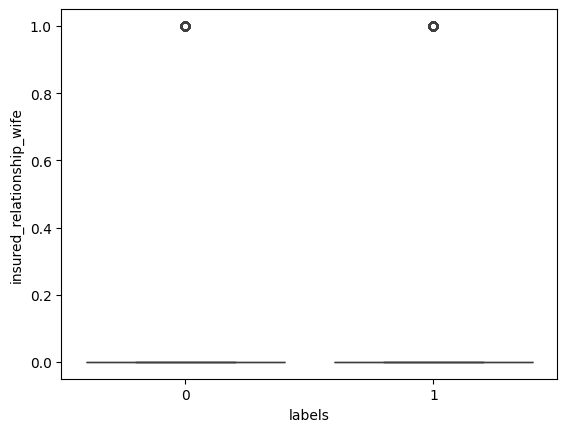

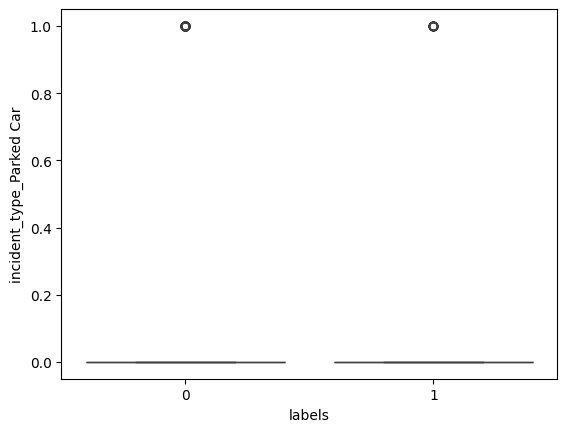

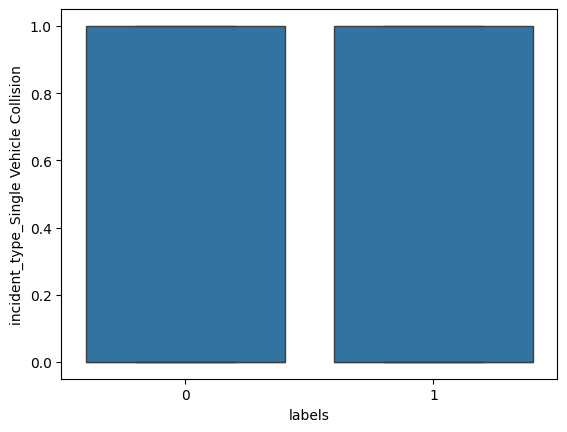

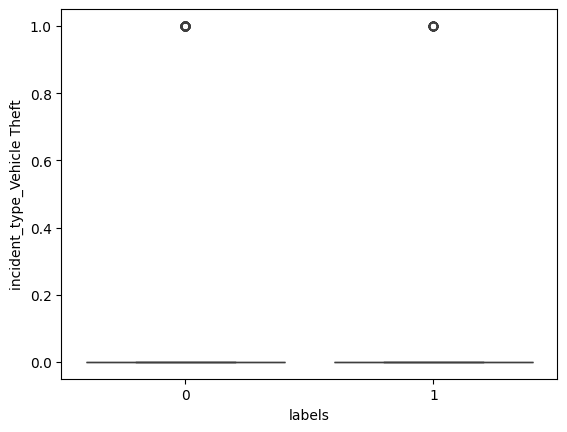

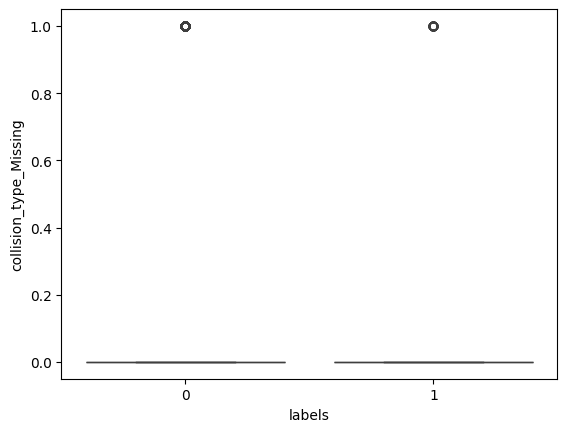

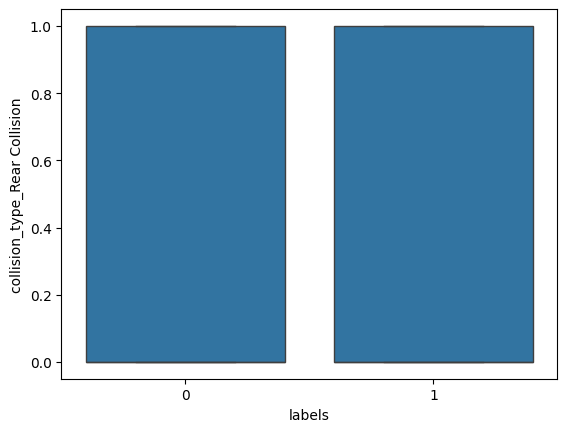

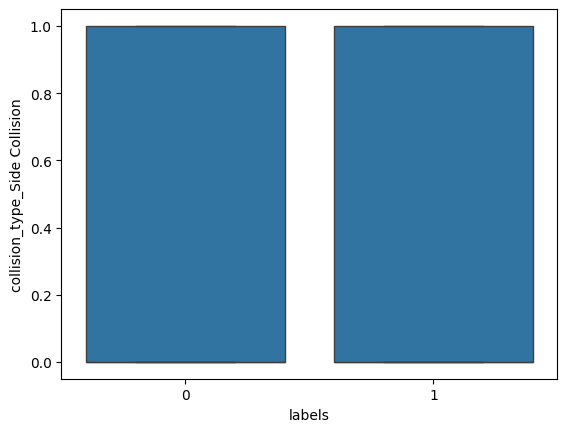

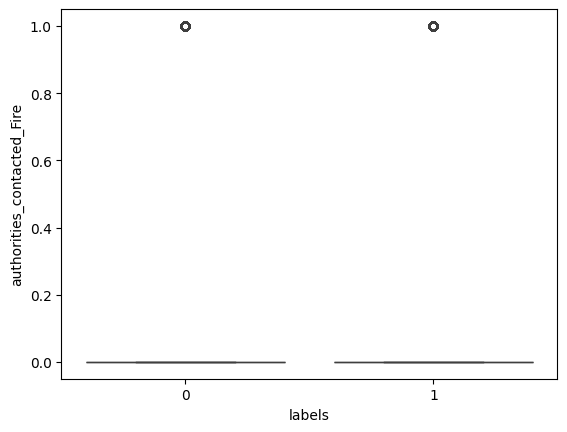

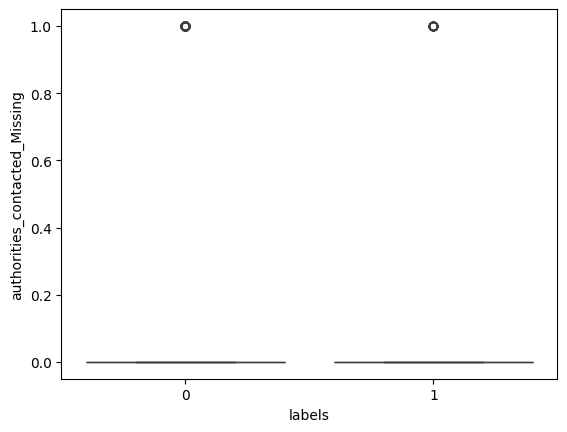

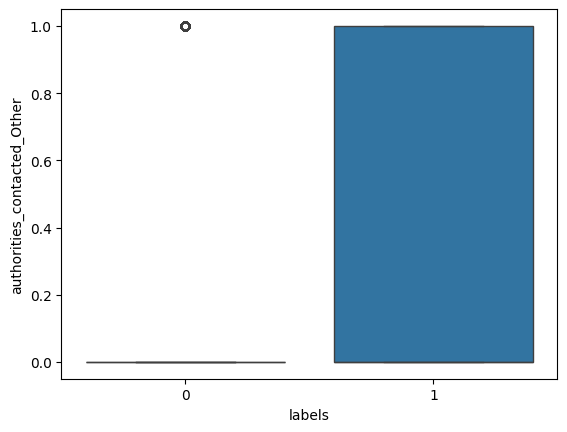

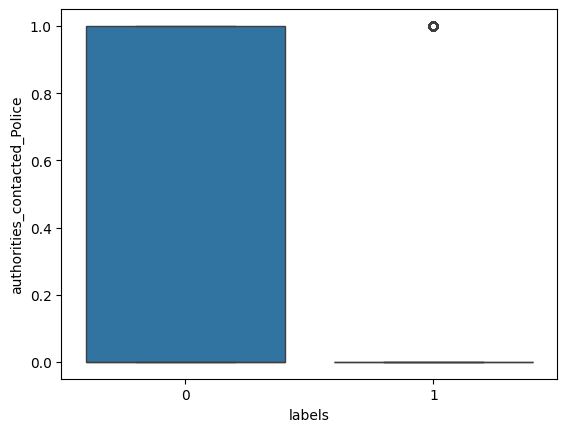

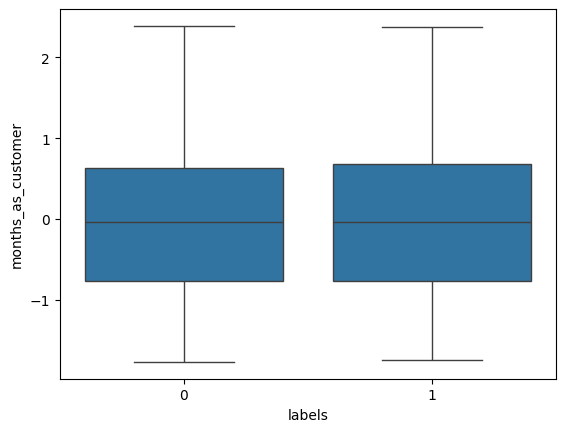

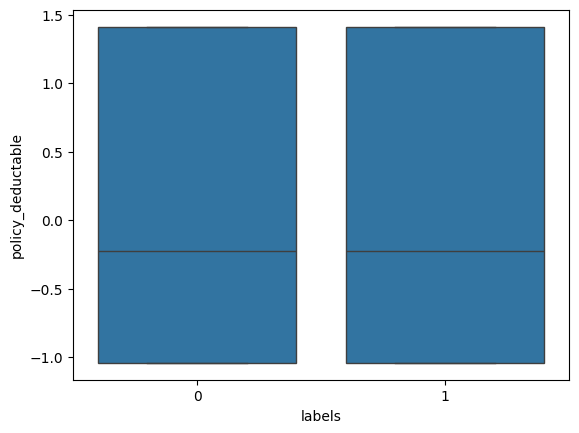

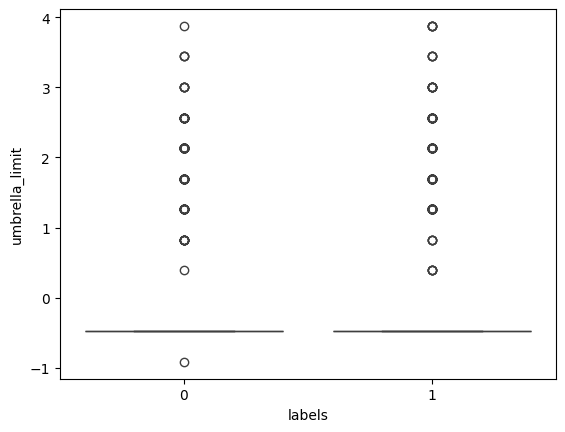

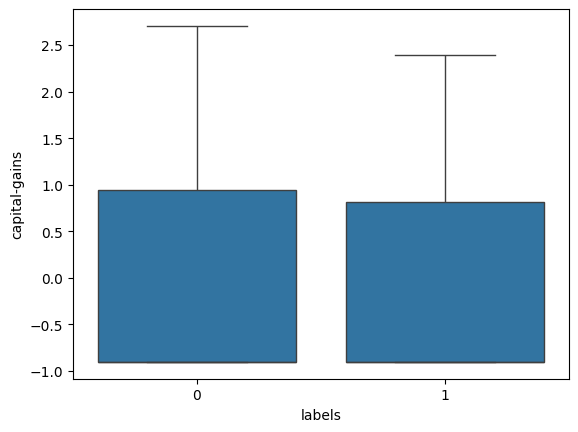

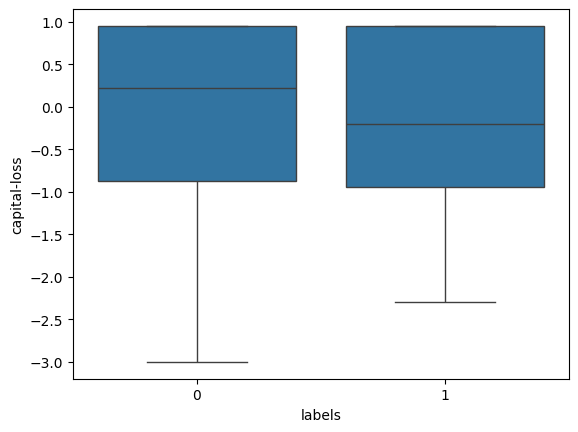

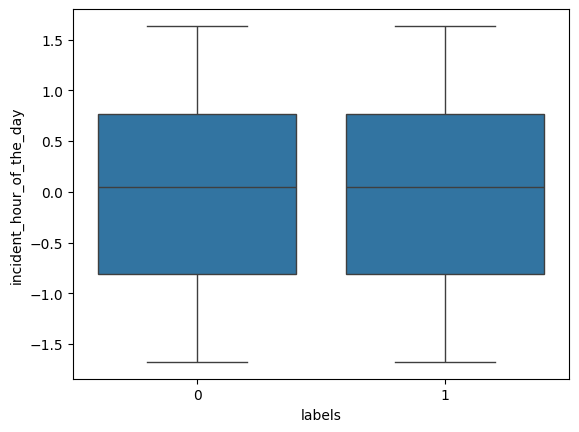

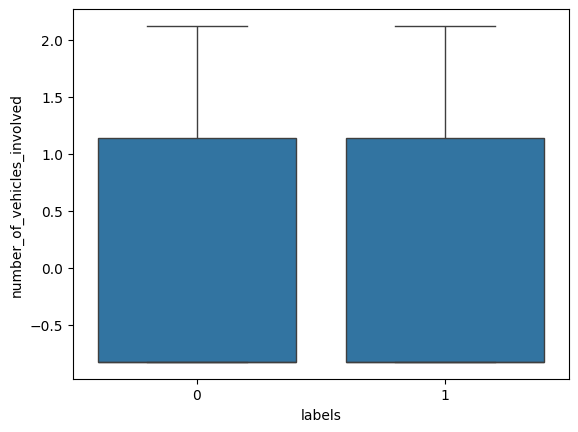

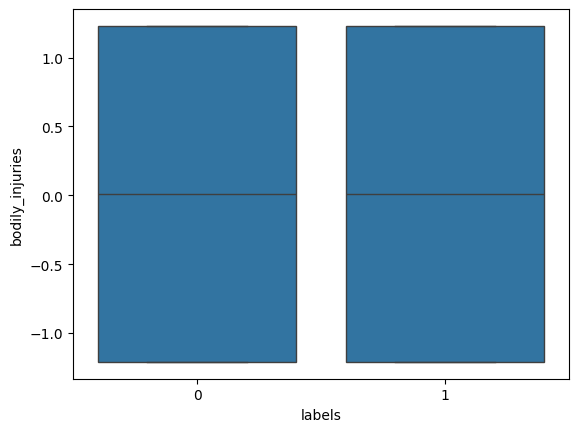

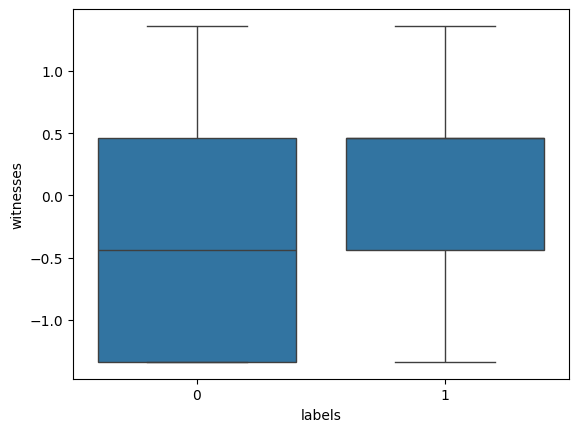

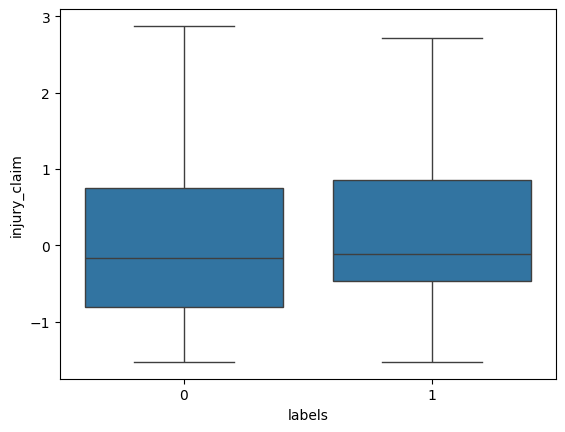

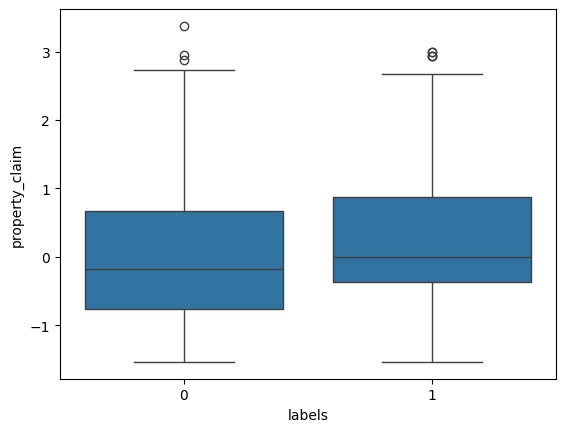

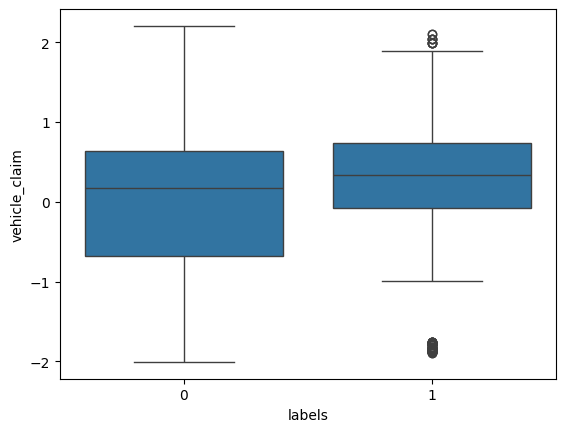

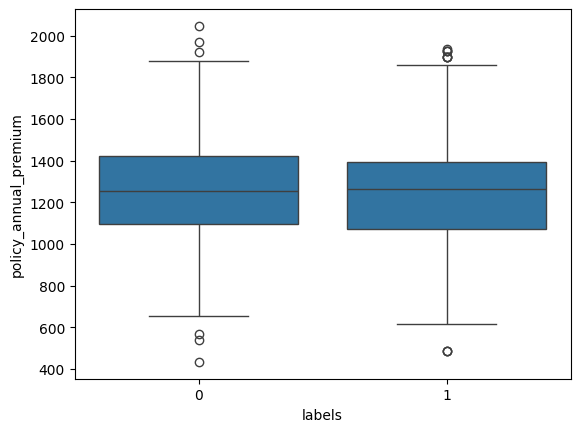

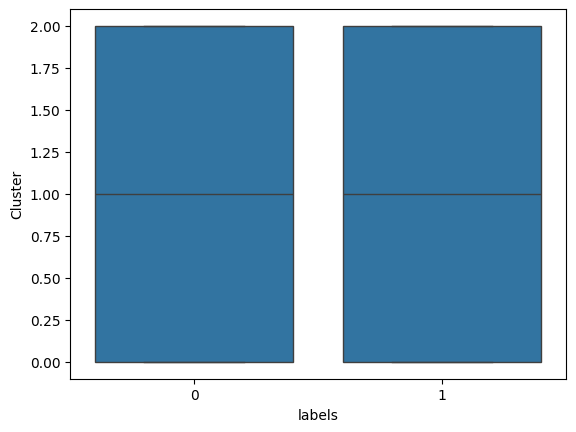

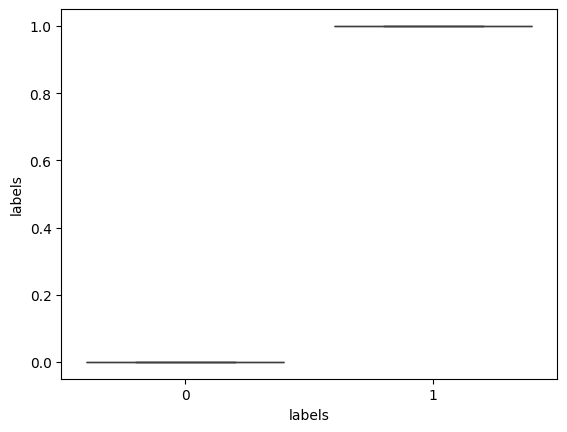

In [98]:
for col_name in data.columns:
    sns.boxplot(data,x="labels",y=col_name)
    plt.show()

In [99]:
### Lets try different models 
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y=data.labels
X=data.drop(columns=["labels","Cluster"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Logistic Regression")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Logistic Regression
Accuracy: 0.59
Confusion Matrix:
[[80 62]
 [62 98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       142
           1       0.61      0.61      0.61       160

    accuracy                           0.59       302
   macro avg       0.59      0.59      0.59       302
weighted avg       0.59      0.59      0.59       302



c:\Users\Ann\Insurance_Fraud\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistic regression is not giving us a good result, so lets focus try XGB , decision tree and SVM.
##### Focus on Recall: In insurance fraud detection, the priority is often on maximizing recall. Missing fraudulent claims (false negatives) can be costly for an insurance company, so the goal is to identify as many fraudulent activities as possible. A high recall ensures that most fraudulent claims are flagged for further investigation, even if it results in some false positives (legitimate claims being flagged as potentially fraudulent).

c:\Users\Ann\Insurance_Fraud\lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


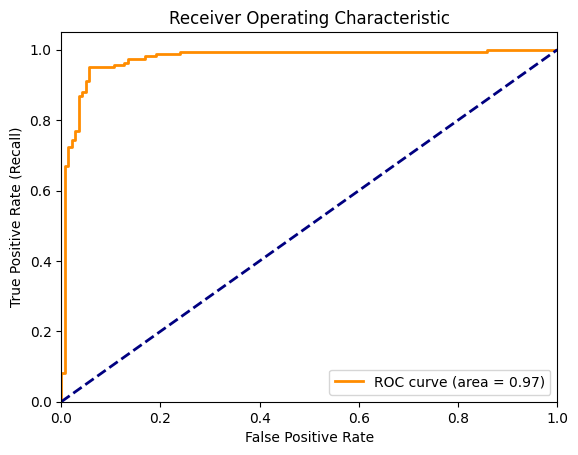

Chosen Threshold: 0.88
Desired Recall: 0.95
Confusion Matrix (Adjusted):
[[134   8]
 [  8 152]]
Classification Report (Adjusted):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       142
           1       0.95      0.95      0.95       160

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302

False Positives: 8
False Negatives: 8
Accuracy: 0.91


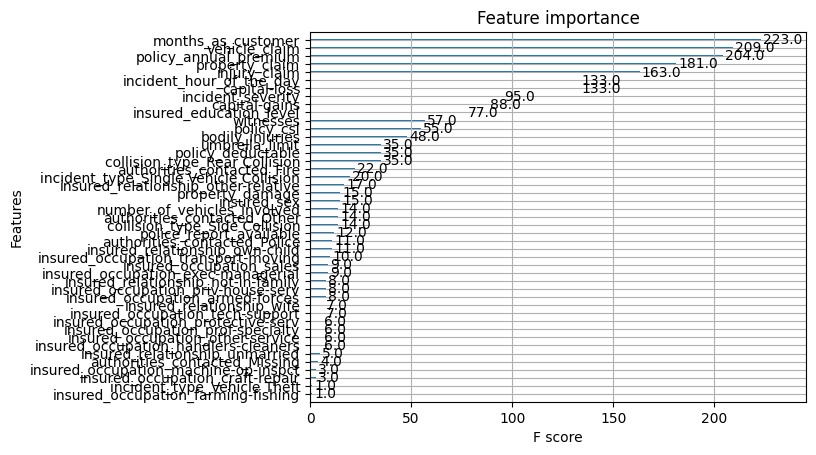

In [101]:
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
# Initialize and train the XGBoost classifier
# Initialize and train the XGBoost model

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Find a threshold that balances false positives and false negatives
# Example threshold choice based on desired recall and precision trade-off
# You can choose a threshold based on your specific needs
desired_recall = 0.95  # Example desired recall
threshold_idx = np.argmax(tpr >= desired_recall)
chosen_threshold = thresholds[threshold_idx]

# Predict with the new threshold
y_pred_adjusted = (y_pred_prob >= chosen_threshold).astype(int)

# Evaluate the adjusted model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
class_report_adjusted = classification_report(y_test, y_pred_adjusted)

print(f"Chosen Threshold: {chosen_threshold:.2f}")
print(f"Desired Recall: {desired_recall}")
print("Confusion Matrix (Adjusted):")
print(conf_matrix_adjusted)
print("Classification Report (Adjusted):")
print(class_report_adjusted)

# Calculate and print False Positives and False Negatives
tn, fp, fn, tp = conf_matrix_adjusted.ravel()
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"Accuracy: {accuracy:.2f}")
xgb.plot_importance(model)
plt.show()

In [102]:
importance_dict = model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame for easier manipulation
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
})

# Print feature importance
print(importance_df)
low_importance_features = importance_df[importance_df['Importance'] < 50]['Feature'].tolist()

# Print features to be dropped
print("Features to drop:", low_importance_features)

                                   Feature  Importance
0                               policy_csl        55.0
1                              insured_sex        15.0
2                  insured_education_level        77.0
3                        incident_severity        95.0
4                          property_damage        15.0
5                  police_report_available        12.0
6          insured_occupation_armed-forces         8.0
7          insured_occupation_craft-repair         3.0
8       insured_occupation_exec-managerial         9.0
9       insured_occupation_farming-fishing         1.0
10    insured_occupation_handlers-cleaners         6.0
11    insured_occupation_machine-op-inspct         3.0
12        insured_occupation_other-service         6.0
13      insured_occupation_priv-house-serv         8.0
14       insured_occupation_prof-specialty         6.0
15      insured_occupation_protective-serv         6.0
16                insured_occupation_sales         9.0
17        

Chosen Threshold: 0.84
Desired Recall: 0.95
Confusion Matrix (Adjusted):
[[135   7]
 [  8 152]]
Classification Report (Adjusted):
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       160

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302

False Positives: 7
False Negatives: 8
Accuracy: 0.92


c:\Users\Ann\Insurance_Fraud\lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


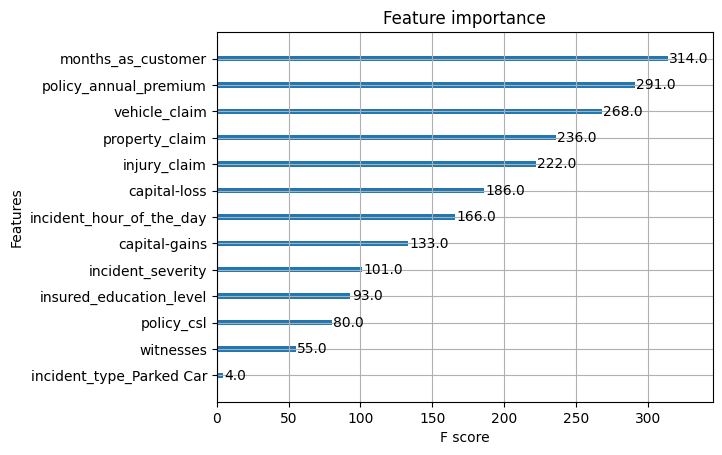

In [103]:
y=data.labels
X=data.drop(columns=["labels","Cluster"])
X=X.drop(columns=low_importance_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)



# Find a threshold that balances false positives and false negatives
# Example threshold choice based on desired recall and precision trade-off
# You can choose a threshold based on your specific needs
desired_recall = 0.95  # 
threshold_idx = np.argmax(tpr >= desired_recall)
chosen_threshold = thresholds[threshold_idx]

# Predict with the new threshold
y_pred_adjusted = (y_pred_prob >= chosen_threshold).astype(int)

# Evaluate the adjusted model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
class_report_adjusted = classification_report(y_test, y_pred_adjusted)

print(f"Chosen Threshold: {chosen_threshold:.2f}")
print(f"Desired Recall: {desired_recall}")
print("Confusion Matrix (Adjusted):")
print(conf_matrix_adjusted)
print("Classification Report (Adjusted):")
print(class_report_adjusted)

# Calculate and print False Positives and False Negatives
tn, fp, fn, tp = conf_matrix_adjusted.ravel()
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"Accuracy: {accuracy:.2f}")
xgb.plot_importance(model)
plt.show()

In [104]:
## lets see the using clusters make in better or not.
results=pd.DataFrame()
for cluster_no in data.Cluster.unique():
    df=data[data.Cluster==cluster_no]
    y=df.labels
    X=df.drop(columns=["labels","Cluster"])
    X=X.drop(columns=low_importance_features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Initialize and train the XGBoost model
    model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]
   
    df_subset=pd.DataFrame()
   
   

  
   # Find a threshold that balances false positives and false negatives
    # Example threshold choice based on desired recall and precision trade-off
    # You can choose a threshold based on your specific needs
    desired_recall = 0.95  # Example desired recall
    threshold_idx = np.argmax(tpr >= desired_recall)
    chosen_threshold = thresholds[threshold_idx]

    # Predict with the new threshold
    y_pred_adjusted = (y_pred_prob >= chosen_threshold).astype(int)
    df_subset["y_pred"]= y_pred_adjusted 
    y_test = y_test.reset_index(drop=True)
    df_subset["y_actual"]=y_test
    results=pd.concat([results,df_subset])
    # Evaluate the adjusted model
     # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

conf_matrix_adjusted = confusion_matrix(results['y_actual'], results["y_pred"])
class_report_adjusted = classification_report(results['y_actual'], results["y_pred"])

print(f"Chosen Threshold: {chosen_threshold:.2f}")
print(f"Desired Recall: {desired_recall}")
print("Confusion Matrix (Adjusted):")
print(conf_matrix_adjusted)
print("Classification Report (Adjusted):")
print(class_report_adjusted)

# Calculate and print False Positives and False Negatives
tn, fp, fn, tp = conf_matrix_adjusted.ravel()
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")


accuracy = accuracy_score(results["y_actual"], results["y_pred"])
print(f"overall accuracy after using clustering :{accuracy}")

c:\Users\Ann\Insurance_Fraud\lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Ann\Insurance_Fraud\lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Ann\Insurance_Fraud\lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Chosen Threshold: 0.01
Desired Recall: 0.95
Confusion Matrix (Adjusted):
[[113  36]
 [ 10 144]]
Classification Report (Adjusted):
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       149
           1       0.80      0.94      0.86       154

    accuracy                           0.85       303
   macro avg       0.86      0.85      0.85       303
weighted avg       0.86      0.85      0.85       303

False Positives: 36
False Negatives: 10
overall accuracy after using clustering :0.8481848184818482


In [105]:
from sklearn.ensemble import RandomForestClassifier
#### Single model is the best option
#### Now try Random forest
y=data.labels
X=data.drop(columns=["labels","Cluster"])
X=X.drop(columns=low_importance_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



# Print confusion matrix
print("Confusion Matrix:")
conf_matrix=confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Feature importances
feature_importances = rf_clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")

# Calculate and print False Positives and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")



Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       142
           1       0.89      0.94      0.92       160

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302

Confusion Matrix:
[[124  18]
 [  9 151]]
Feature Importances:
False Positives: 18
False Negatives: 9


In [106]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print("Best Score:")
print(grid_search.best_score_)
best_params=grid_search.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:
0.9028319502074688


In [107]:
from sklearn.ensemble import RandomForestClassifier
#### Single model is the best option
#### Now try Random forest
rf_clf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'],
                                   random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



# Print confusion matrix
print("Confusion Matrix:")
conf_matrix=confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Feature importances
feature_importances = rf_clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")

# Calculate and print False Positives and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")



Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       142
           1       0.88      0.96      0.92       160

    accuracy                           0.91       302
   macro avg       0.92      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302

Confusion Matrix:
[[122  20]
 [  7 153]]
Feature Importances:
False Positives: 20
False Negatives: 7


In [108]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score




# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1.0],
    'reg_lambda': [0, 0.1, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print("Best Score:")
print(grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


Fitting 3 folds for each of 19683 candidates, totalling 59049 fits
Best Parameters:
{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.8}
Best Score:
0.8586317232150567
Test Accuracy: 0.90


#### Conclusions:
1. Data Clustering is not helping to improve the metrics
2. XGB and Random forest are the best models to use
3. Aim to reduce false negatives than false postives
